<a href="https://colab.research.google.com/github/LydiaMarina/Lead_Scoring_CaseStudy/blob/main/LFJC1Swiggydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
from ydata_profiling import ProfileReport

In [4]:
df = pd.read_csv('swiggy_file_ratings_Hyd.csv')
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10K+ ratings,₹350 for two,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹179, FLAT D...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5K+ ratings,₹300 for two,2,FLAT DEAL\nFLAT ₹100 OFF\nUSE FLATDEALABOVE ₹4...,Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1K+ ratings,₹300 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad


In [3]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cadd86a9024440bf7d4dc0ae53a1a8c1f39e2e074168f20514a42fe19c6a2319
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 34.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant Name    1998 non-null   object
 1   Cuisine            1998 non-null   object
 2   Rating             1998 non-null   object
 3   Number of Ratings  1763 non-null   object
 4   Average Price      1998 non-null   object
 5   Number of Offers   1998 non-null   int64 
 6   Offer Name         1980 non-null   object
 7   Area               1998 non-null   object
 8   Pure Veg           1998 non-null   object
 9   Location           1998 non-null   object
dtypes: int64(1), object(9)
memory usage: 156.2+ KB


In [8]:
df.nunique()

,0
Restaurant Name,1994
Cuisine,443
Rating,37
Number of Ratings,17
Average Price,77
Number of Offers,6
Offer Name,702
Area,152
Pure Veg,2
Location,1


In [9]:
df.isnull().sum()

,0
Restaurant Name,0
Cuisine,0
Rating,0
Number of Ratings,235
Average Price,0
Number of Offers,0
Offer Name,18
Area,0
Pure Veg,0
Location,0


In [10]:
df.describe()

,Number of Offers
count,1998.000000
mean,2.262763
std,1.360257
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


**Data Cleaning**

In [11]:
#The average price is replaced from 'â‚¹50 for one' to 50
df['Average Price'] = df['Average Price'].str.extract('(\d+)').fillna(0).astype(int)
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10K+ ratings,350,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹179, FLAT D...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5K+ ratings,300,2,FLAT DEAL\nFLAT ₹100 OFF\nUSE FLATDEALABOVE ₹4...,Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1K+ ratings,300,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad


In [25]:
#The restaurants with rating '-' is replaced with zero
df['Rating'] = df['Rating'].replace('--', '0')
df['Rating'] = df['Rating'].replace('NEW', '0')
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10K+ ratings,350,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹179, FLAT D...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5K+ ratings,300,2,FLAT DEAL\nFLAT ₹100 OFF\nUSE FLATDEALABOVE ₹4...,Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1K+ ratings,300,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad


In [27]:
 #The restaurants with rating '-' is replaced with zero
df['Number of Ratings'] = df['Number of Ratings'].replace('Too Few Ratings', '0')
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10K+ ratings,350,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹179, FLAT D...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5K+ ratings,300,2,FLAT DEAL\nFLAT ₹100 OFF\nUSE FLATDEALABOVE ₹4...,Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1K+ ratings,300,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad
3,Lucky Multicuisine Restaurant,"Biryani, North Indian",3.7,10K+ ratings,400,4,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹179, Free ...",Madhapur,No,Hyderabad
4,Mehfil,"Biryani, North Indian",4.1,10K+ ratings,300,3,"10% OFF UPTO ₹40\nUSE TRYNEWABOVE ₹159, Free D...",Manikonda,No,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
161,Kadapa Dosa House,South Indian,4.2,5K+ ratings,300,3,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹159, FLAT D...",Gachibowli,Yes,Hyderabad
162,Big Wok,Chinese,0,0,180,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Madhapur,No,Hyderabad
163,Felfelah Restaurant,"Indian, Afghani",4.1,1K+ ratings,300,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad
164,New Arman Hotel,"Biryani, Andhra",4.3,500+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad


In [28]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\+.*', '', regex=True)
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10K,350,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹179, FLAT D...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5K,300,2,FLAT DEAL\nFLAT ₹100 OFF\nUSE FLATDEALABOVE ₹4...,Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1K,300,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Tolichowki,No,Hyderabad


In [32]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\D', '', regex=True)
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10,350,3,"20% OFF UPTO ₹50,USE TRYNEWABOVE ₹179, FLAT DE...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5,300,2,"FLAT DEAL,FLAT ₹100 OFF,USE FLATDEALABOVE ₹499...",Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1,300,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Tolichowki,No,Hyderabad


In [30]:
df['Offer Name'] = df['Offer Name'].str.replace('\n', ',')
df.head(3)

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian",4.1,10,350,3,"20% OFF UPTO ₹50,USE TRYNEWABOVE ₹179, FLAT DE...",Gachibowli,No,Hyderabad
1,Leon'S - Burgers & Wings (Leon Grill),"American, Snacks",4.4,5,300,2,"FLAT DEAL,FLAT ₹100 OFF,USE FLATDEALABOVE ₹499...",Manikonda,No,Hyderabad
2,Bakingo,Bakery,4.4,1,300,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Tolichowki,No,Hyderabad


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_notebook_iframe()

**EDA**-
What is the distribution of Pure Vegetarian Restaurants?

In [33]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

# Plot a pie chart
fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='plotly_dark'
)

fig.show()

What is the distribution of Ratings? How many ratings do restaurants typically have?

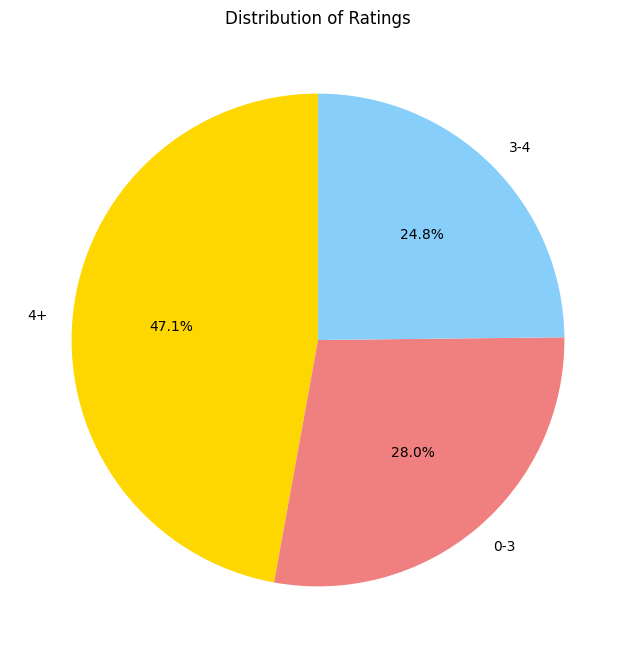

In [34]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = df['Rating Category'].value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()

 # To Check pie chart.
 What is the distribution of Average Prices?*italicized text*

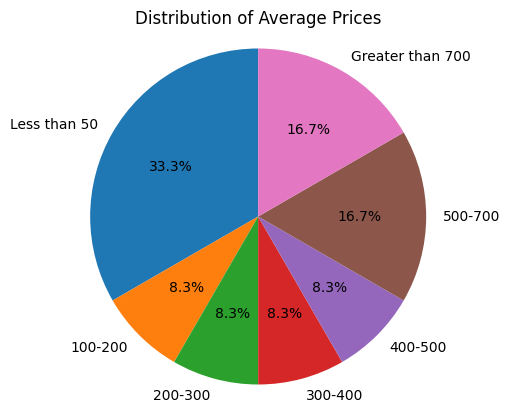

In [36]:
#After getting the unique prices, we can divide them into different categories
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450, 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

# Define the price ranges
price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
}

# Count the occurrences in each price range
price_counts = {range_name: sum(price_range(price) for price in unique_prices) for range_name, price_range in price_ranges.items()}


labels = price_counts.keys()
sizes = price_counts.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Distribution of Average Prices')
plt.show()

Top 15 cuisines

In [37]:
#To find all possible Cuisine in the dataset
cuisine_column = df['Cuisine']

all_cuisines = [cuisine.split(', ') for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

# print("All Possible Cuisines:", unique_cuisines)

In [38]:
cuisine_counts = df['Cuisine'].str.split(', ').explode().value_counts()
top_15_cuisines = cuisine_counts.head(15)
plot_data = pd.DataFrame({'Cuisine': top_15_cuisines.index, 'Frequency': top_15_cuisines.values})
colors = px.colors.qualitative.Set3

fig = px.bar(plot_data, x='Frequency', y='Cuisine', color='Cuisine',
             color_discrete_sequence=colors,
             orientation='h', labels={'Frequency': 'Frequency'},
             title='Top 15 Cuisines', width=800, height=500)

fig.update_layout(showlegend=False)
fig.show()

How many restaurants are there for each cuisine?

In [39]:
# Count the number of restaurants for each cuisine
restaurant_counts_per_cuisine = df.groupby('Cuisine')['Restaurant Name'].nunique().sort_values(ascending=False)

# Select the top 15 cuisines by restaurant count
top_15_cuisines_restaurant_count = restaurant_counts_per_cuisine.head(15)

# Prepare data for plotting
plot_data_restaurants = pd.DataFrame({'Cuisine': top_15_cuisines_restaurant_count.index, 'Restaurant Count': top_15_cuisines_restaurant_count.values})

# Plotting the number of restaurants for each cuisine
fig_restaurants = px.bar(plot_data_restaurants, x='Restaurant Count', y='Cuisine', color='Cuisine',
                         color_discrete_sequence=colors, orientation='h', labels={'Restaurant Count': 'Restaurant Count'},
                         title='Number of Restaurants for Top 15 Cuisines', width=800, height=500)

fig_restaurants.update_layout(showlegend=False)
fig_restaurants.show()

Distribution of Number of Offers for Restaurants

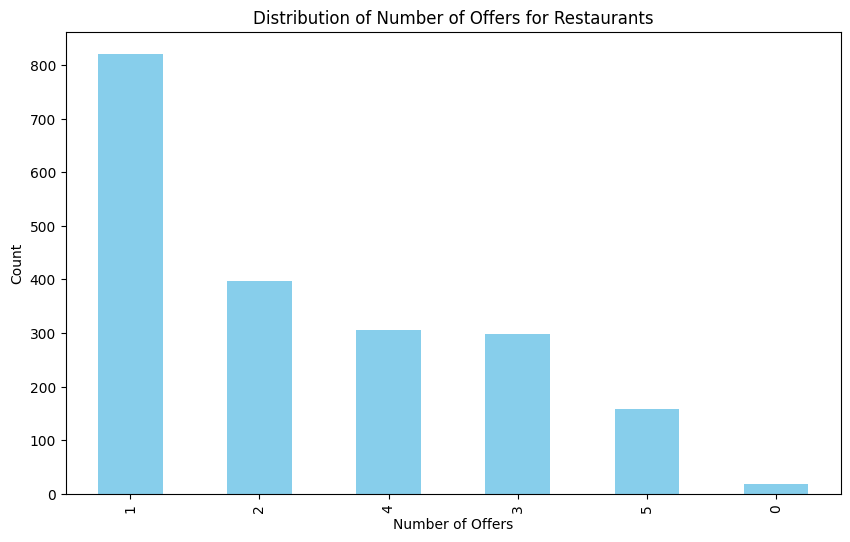

In [40]:
number_of_offers_distribution = df['Number of Offers'].value_counts()

# Plotting the distribution of the number of offers
plt.figure(figsize=(10, 6))
number_of_offers_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Offers')
plt.ylabel('Count')
plt.title('Distribution of Number of Offers for Restaurants')
plt.show()

Top 15 Areas with highest rating

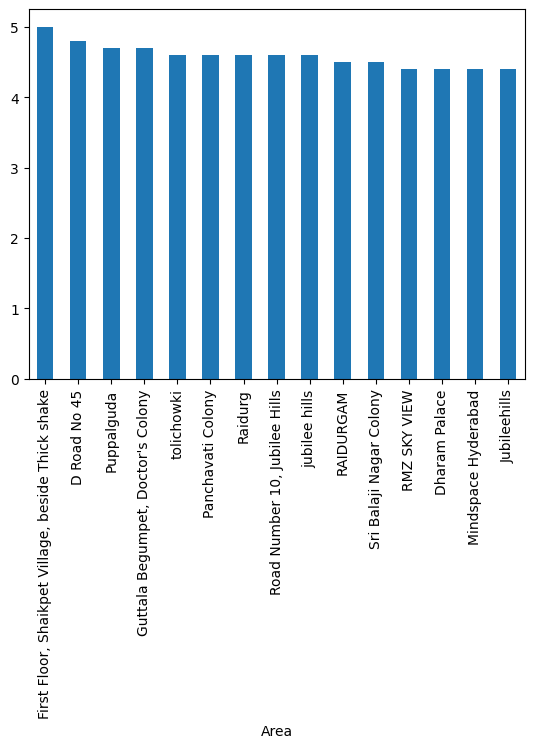

In [47]:
# Ensure that the rating information is available in the dataset
if 'Rating' in df.columns:
    # Group the data by area and calculate the mean rating
    Area_rating = df.groupby('Area')['Rating'].mean()

    # Sort the lAreas based on the average rating and get the top 5 Areas
    top_5_Area = Area_rating.sort_values(ascending=False).head(15)

    # Print the top 5 Area
    # print(top_5_Area)

    # Visualize the top 5 locations using a bar plot
    top_5_Area.plot(kind='bar')
else:
    print("Rating information is not available in the dataset.")

# To create Cluster
Location specific Top 5 Cuisine


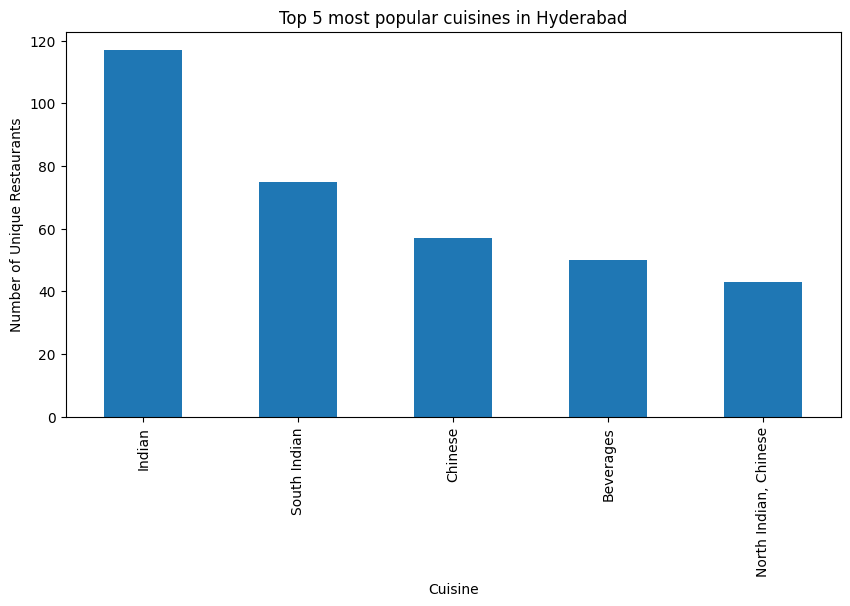

In [44]:
# Filter the dataframe to only include rows with the "city" column
df_city = df[df['Location'].notnull()]

# Group the data by city and cuisine and calculate the number of unique restaurants for each cuisine
pivot_table = df_city.pivot_table(index='Location', columns='Cuisine', values='Restaurant Name', aggfunc=lambda x: len(x.unique()))

# Sort the pivot table by the number of unique restaurants in descending order
pivot_table = pivot_table.sort_values(by='South Indian', ascending=False)

# Filter the pivot table to only include rows with the "Kanpur" index
kanpur_pivot_table = pivot_table.loc['Hyderabad']

# Get the top 5 most popular cuisines from the filtered pivot table
top_cuisines = kanpur_pivot_table.sort_values(ascending=False)[:5]

# Create a figure with 1 row and 1 column for the subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the top 5 most popular cuisines in a bar plot
top_cuisines.plot(kind='bar', ax=ax)
ax.set_title("Top 5 most popular cuisines in Hyderabad")
ax.set_xlabel("Cuisine")
ax.set_ylabel("Number of Unique Restaurants")

# Show the figure
plt.show()

In [ ]:
# # Filter the dataframe to only include rows with the "city" column
# df_city = df[df['Location'].notnull()]

# # Group the dataframe by the "cuisine" column and calculate the number of unique restaurants for each cuisine
# cuisine_counts = df_city['Cuisine'].value_counts()

# # Sort the resulting dataframe by the number of unique restaurants in descending order
# cuisine_counts = cuisine_counts.sort_values(ascending=False)

# # Display the top 5 most popular cuisines for each city
# print("Top 5 most popular cuisines in each city:")
# for city, group in df_city.groupby('Location'):
#     print(f"\nLocation: {city}")
#     print(cuisine_counts[:5].head(5))

WORD CLOUD


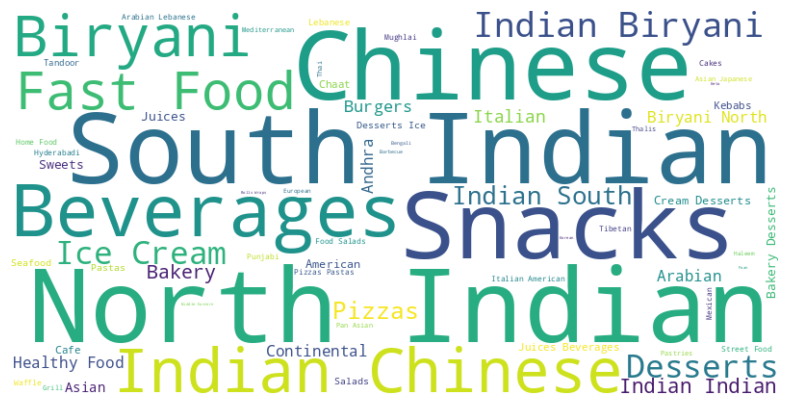

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuisine_text = ','.join(df['Cuisine'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Relation between Average Price and **Rating**

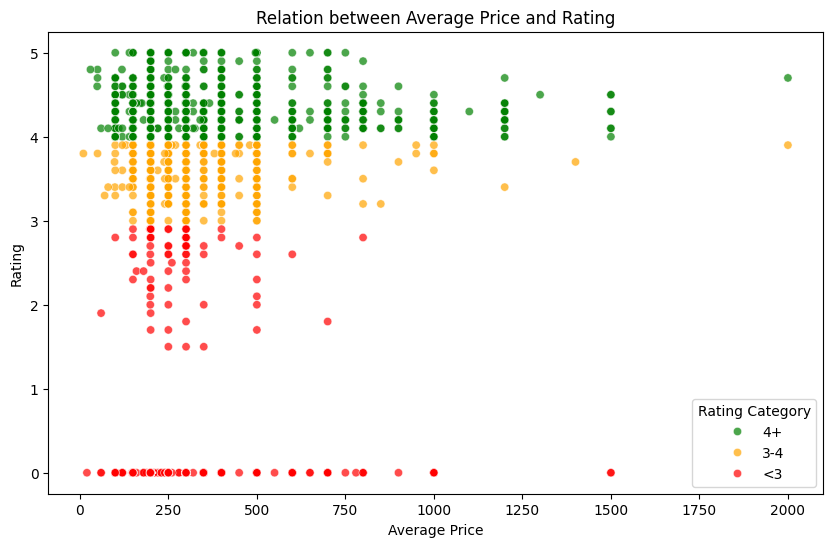

In [46]:
average_price = df['Average Price']
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define rating categories
def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

df['Rating Category'] = df['Rating'].apply(categorize_rating)

# Define a color palette for each category
palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_price, y=df['Rating'], hue=df['Rating Category'], palette=palette, alpha=0.7)
plt.title('Relation between Average Price and Rating')
plt.xlabel('Average Price')
plt.ylabel('Rating')
plt.legend(title='Rating Category')
plt.show()

Relation between No of Offers and **Rating**

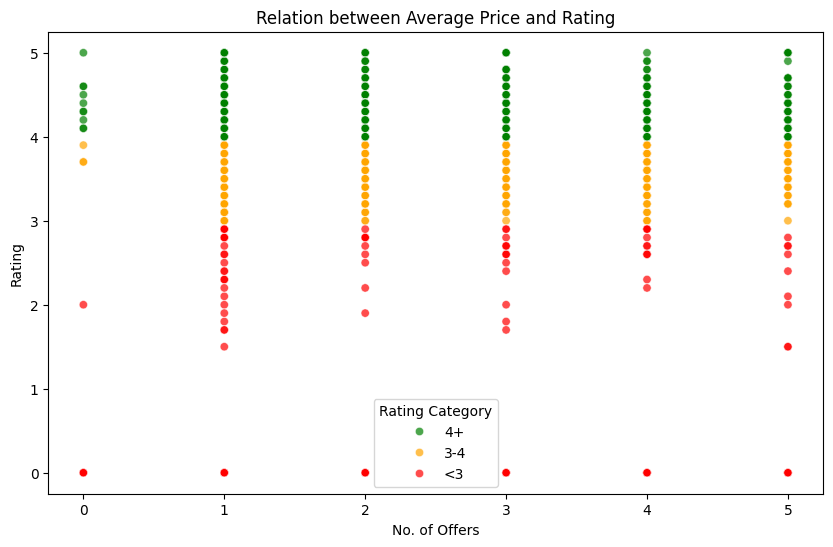

In [49]:
Number_of_Offers = df['Number of Offers']
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define rating categories
def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

df['Rating Category'] = df['Rating'].apply(categorize_rating)

# Define a color palette for each category
palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Number_of_Offers, y=df['Rating'], hue=df['Rating Category'], palette=palette, alpha=0.7)
plt.title('Relation between Average Price and Rating')
plt.xlabel('No. of Offers')
plt.ylabel('Rating')
plt.legend(title='Rating Category')
plt.show()

Relation between Cuisines and No. of.Ratings

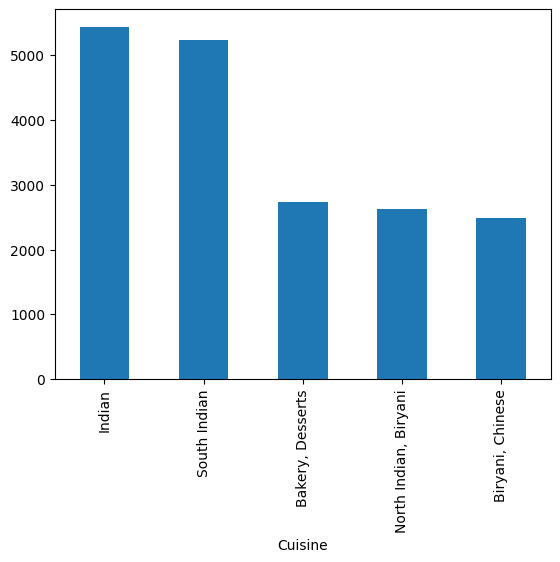

In [71]:
# Ensure that the rating information is available in the dataset
if 'Number of Ratings' in df.columns:
    # Group the data by location and calculate the mean rating
    Cuisine_rating = df.groupby('Cuisine')['Number of Ratings'].sum()

    # Sort the locations based on the average rating and get the top 5 locations
    top_5_Cuisines = Cuisine_rating.sort_values(ascending=False).head(5)

    # Print the top 15 locations
#     print(top_5_Cuisiness)

    # Visualize the top 5 locations using a bar plot
    top_5_Cuisines.plot(kind='bar')
else:
    print("Rating information is not available in the dataset.")

Relation between Restaurant and Ratings

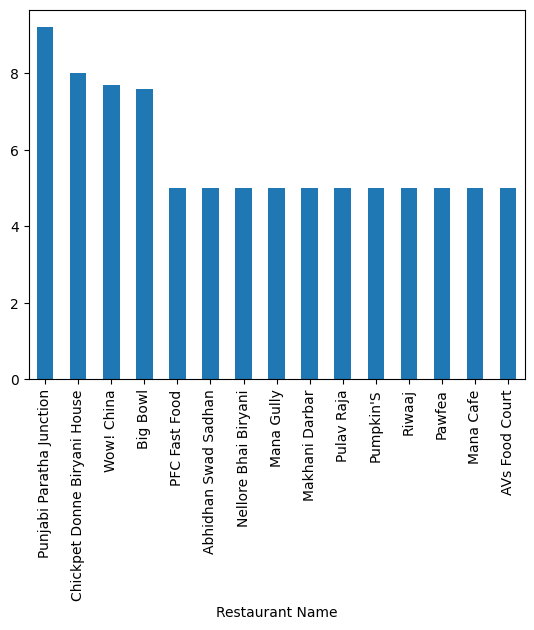

In [79]:
# Ensure that the rating information is available in the dataset
if 'Rating' in df.columns:
    # Group the data by location and calculate the mean rating
    Restaurant_rating = df.groupby('Restaurant Name')['Rating'].sum()

    # Sort the locations based on the average rating and get the top 5 locations
    top_15_Restaurant = Restaurant_rating.sort_values(ascending=False).head(15)

    # Print the top 15 locations
#     print(top_5_Cuisiness)

    # Visualize the top 5 locations using a bar plot
    top_15_Restaurant.plot(kind='bar')
else:
    print("Rating information is not available in the dataset.")